# **Costumer Churn Analytics: Data Scientists’ Journey**
### Created By : Immaculata Viandra

## **Business Problem Understanding**

**1. Latar Belakang**

**Perusahaan e-commerce** di Indonesia saat ini menghadapi persaingan yang sangat ketat. Salah satu tantangan terbesar adalah mempertahankan pelanggan agar tidak beralih ke platform pesaing (customer churn). Setiap pelanggan yang berhenti menggunakan layanan tidak hanya berarti kehilangan pendapatan, tetapi juga berpotensi meningkatkan biaya akuisisi pelanggan baru. Dengan berbekal data transaksi pelanggan, profil, serta histori lainnya yang tersimpan dalam dataset data_ecommerce_customer_churn.csv, perusahaan ingin memahami faktor-faktor apa saja yang mendorong pelanggan untuk tetap setia atau justru berhenti berlangganan/berbelanja. Dengan wawasan ini, perusahaan dapat menyusun strategi retensi yang lebih efektif dan meningkatkan loyalitas pelanggan.

**2. Pernyataan Masalah**

Saat ini, perusahaan belum memiliki sistem yang dapat secara otomatis mengidentifikasi pelanggan yang berpotensi churn (berhenti berbelanja/berlangganan). Akibatnya, perusahaan sering terlambat dalam mengambil tindakan retensi dan kehilangan peluang untuk mempertahankan pelanggan berharga. Jika upaya retensi, seperti promosi atau penawaran khusus, diberikan ke seluruh pelanggan tanpa seleksi, maka akan terjadi pemborosan biaya karena sebagian besar pelanggan sebenarnya tidak berminat untuk churn. Oleh karena itu, perusahaan ingin dapat memfokuskan usaha dan biaya pada pelanggan yang benar-benar berisiko tinggi untuk churn.

**3. Goals**

Berdasarkan permasalahan di atas, tujuan utama perusahaan adalah:
- Membangun kemampuan untuk memprediksi kemungkinan seorang pelanggan akan melakukan churn (1) atau tetap loyal (0), sehingga upaya retensi dapat difokuskan pada pelanggan yang benar-benar membutuhkan perhatian lebih.
- Mengidentifikasi faktor-faktor utama yang mempengaruhi churn, agar perusahaan dapat membuat strategi yang lebih terarah dalam meningkatkan kepuasan dan loyalitas pelanggan.

**4. Analytic Approach**

Langkah-langkah analitik yang akan diambil adalah:
- Menganalisis data pelanggan untuk menemukan pola dan karakteristik yang membedakan pelanggan yang churn dan yang tidak churn.
- Membangun model klasifikasi (misal: Logistic Regression, Random Forest, dsb) yang dapat memprediksi probabilitas seorang pelanggan akan churn, berbasis fitur-fitur yang tersedia dalam dataset.
- Menginterpretasikan model untuk mengetahui variabel/faktor mana yang paling signifikan dalam mempengaruhi churn, sehingga dapat menjadi dasar strategi bisnis.

**5. Metrics**

- False Positive (FP)
    - Definisi: Model memprediksi pelanggan akan churn (1), padahal sebenarnya pelanggan tidak churn (0).
    
    - Konsekuensi:
        1. Perusahaan mungkin memberikan penawaran, diskon, atau promosi retensi yang tidak diperlukan.
        2. Terjadi pemborosan biaya pemasaran pada pelanggan yang sebenarnya sudah loyal.
    - Dampak:
    Biaya retensi meningkat, namun tidak terlalu berdampak buruk pada pendapatan.

- False Negative (FN)
    - Definisi: Model memprediksi pelanggan tidak akan churn (0), padahal sebenarnya pelanggan churn (1).
    
    - Konsekuensi:
        1. Perusahaan gagal mengidentifikasi pelanggan yang benar-benar akan churn sehingga tidak melakukan upaya retensi.
        2. Potensi kehilangan pendapatan dari pelanggan tersebut.
    - Dampak:
    Kehilangan pelanggan yang mungkin bernilai tinggi, menurunkan tingkat loyalitas, dan berdampak pada pertumbuhan bisnis.

**Kesimpulan :** <br>
Dalam konteks prediksi churn pelanggan e-commerce:
**Recall** untuk kelas churn (1) adalah metrik yang sangat penting. Tujuannya adalah *meminimalkan jumlah pelanggan yang benar-benar churn tetapi tidak terdeteksi oleh model (False Negative)*, sehingga perusahaan dapat mengambil tindakan proaktif untuk mempertahankan mereka.

Dengan menggunakan **F2-score** yaitu, lebih penting mendeteksi sebanyak mungkin pelanggan yang benar-benar akan churn, meskipun ada beberapa False Positive.


## **Data Understanding**

| Features | Description |
| --- | --- |
| Tenure | Lama waktu (dalam bulan) pelanggan telah menggunakan layanan atau menjadi anggota |
| WarehouseToHome | Jarak pengiriman dari gudang/store ke alamat pelanggan (dalam kilometer) |
| NumberOfDeviceRegistered | Jumlah perangkat yang terdaftar oleh pelanggan untuk mengakses platform/website supermarket |
| PreferedOrderCat | Kategori pesanan yang biasa pelanggan beli/suka |
| SatisfactionScore | Skor kepuasan (1, 2, 3, 4, 5) |
| MaritalStatus | Satus perkawinan pelanggan |
| NumberOfAddress | Nomor alamat rumah |
| Complain | Apakah pelanggan pernah komplain? 0 untuk tidak pernah | 1 untuk pernah |
| DaySinceLastOrder | Pembelian terakhir yang dilakukan oleh pelanggan (dalam hari) |
| CashbackAmount | Jumlah cashback yang diberikan kepada pelanggan |

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# scaling
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, recall_score, fbeta_score, make_scorer, precision_score

import warnings
warnings.filterwarnings('ignore')

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


## **Data Cleaning**

In [4]:
print("\nNilai Unik\n")
for col in df.columns:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print(df[col].nunique())
    print("-" * 60)


Nilai Unik

Kolom: Tenure
[15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10. nan  8. 19.  0.  3.  5.  9.
 18. 12. 24.  4. 61. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28. 51. 60.
 50.]
36
------------------------------------------------------------
Kolom: WarehouseToHome
[ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.  nan   6.  31.  28.  10.  19.  32.  23.  30.
  35.  34.  24.   5.  36. 127.]
33
------------------------------------------------------------
Kolom: NumberOfDeviceRegistered
[4 3 6 2 5 1]
6
------------------------------------------------------------
Kolom: PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']
6
------------------------------------------------------------
Kolom: SatisfactionScore
[3 1 4 2 5]
5
------------------------------------------------------------
Kolom: MaritalStatus
['Single' 'Married' 'Divorced']
3
------------------------------------------------------------
Kolom: N

In [5]:
#list untuk menyimpan hasil
hasil = []

for col in df.columns:
    unik = df[col].unique()
    hasil.append({
        'Kolom': col,
        'Jumlah Nilai Unik': df[col].nunique(),
        'Nilai Unik': unik
    })

#konversi ke DataFrame agar tampil seperti tabel
hasil_df = pd.DataFrame(hasil)

#tampil tabel
pd.set_option('display.max_colwidth', None)  #agar semua nilai unik terlihat
hasil_df

,Kolom,Jumlah Nilai Unik,Nilai Unik
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


dari table nilai unik tersebut, 
1. dapat dilihat bahwa terdapat nilai nan di kolom : Tenure, WarehouseToHome, DaySinceLastOrder
2. kolom NumberOfAddress sebagai identitas dari pelanggan, yang berarti feature ini bukan menjadi sebuah faktor penunjang dalam prediksi churn.

Cek Nan dan Missing Value

In [6]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(671)

In [8]:
df.drop_duplicates(inplace=True)

Menghapus kolom NumberOfAddress

In [9]:
df.drop(columns=['NumberOfAddress'], inplace=True)
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5,Fashion,4,Married,0,8.0,249.90,0
3935,26.0,7.0,4,Grocery,1,Married,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,Married,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,0,4.0,157.80,0


## **EDA (Exploratory Data Analysis)**

<Figure size 2000x800 with 0 Axes>

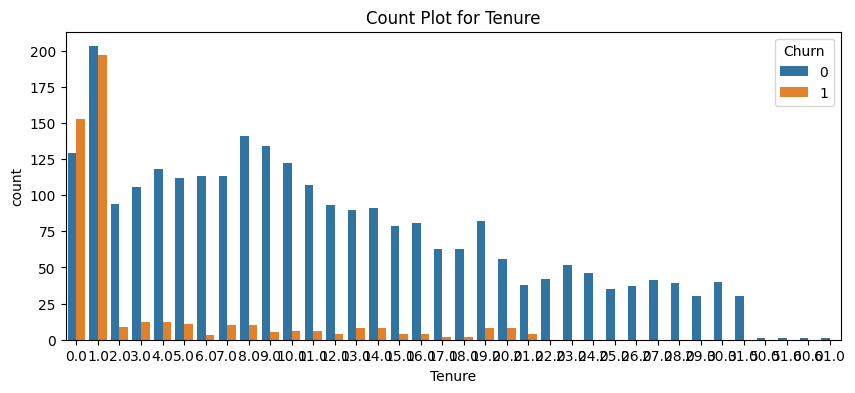

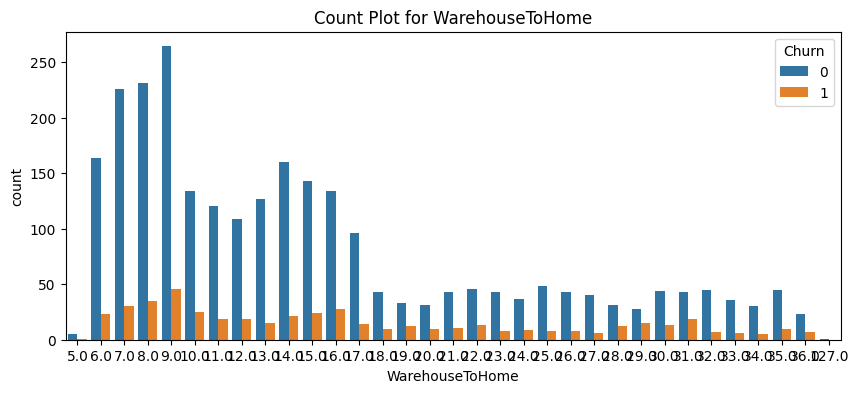

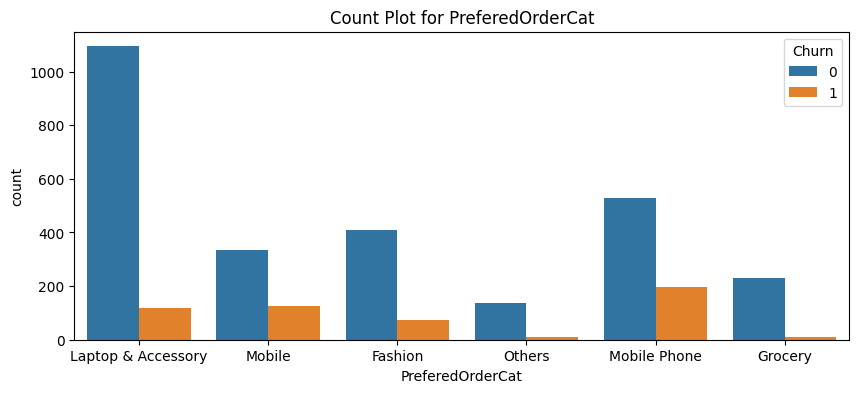

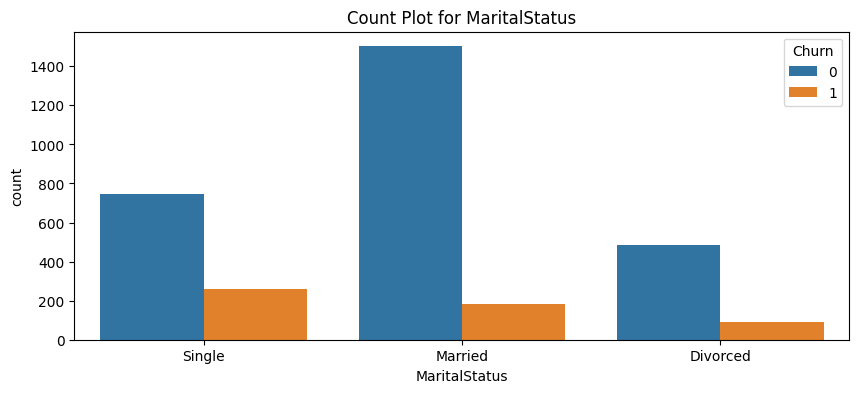

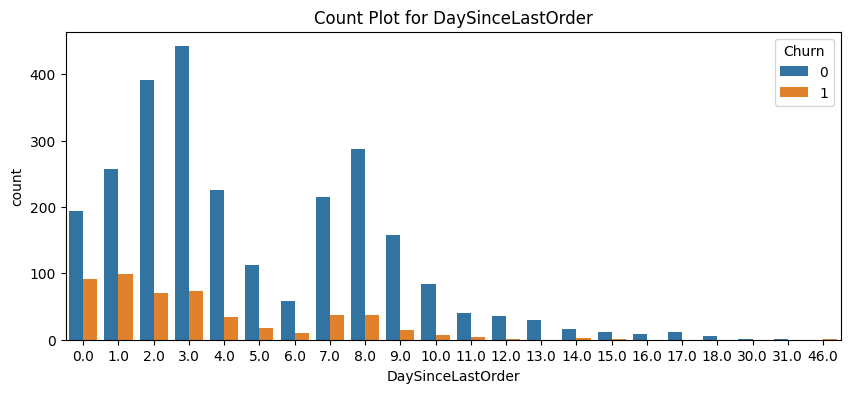

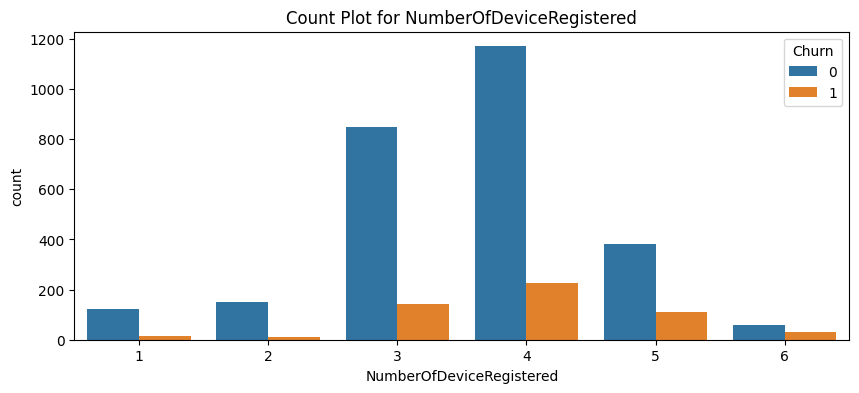

In [10]:
features = ['Tenure', 'WarehouseToHome', 'PreferedOrderCat', 'MaritalStatus', 'DaySinceLastOrder', 'NumberOfDeviceRegistered']
plt.figure(figsize=(20, 8))

for feature in features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'Count Plot for {feature}')
    plt.show()

1. **Tenure (Lama Menjadi Pelanggan)**: Pelanggan dengan masa keanggotaan yang lebih pendek (tenure rendah) cenderung memiliki tingkat churn yang lebih tinggi. Semakin lama pelanggan bertahan, semakin kecil kemungkinan mereka churn.
2. **WarehouseToHome (Jarak Pengiriman):** Sebagian besar pelanggan berada pada jarak pengiriman yang relatif dekat (5-15 km). Jumlah churn sedikit lebih tinggi pada jarak yang lebih dekat, namun secara umum, semakin jauh jaraknya, jumlah pelanggan (baik churn maupun tidak) semakin menurun.
3. **PreferedOrderCat (Kategori Pesanan Favorit)**: Pelanggan yang paling banyak tidak churn berasal dari kategori "Laptop & Accessory", diikuti oleh "Mobile Phone" dan "Fashion". Namun, pada semua kategori, jumlah pelanggan yang churn jauh lebih sedikit dibandingkan yang tidak churn.
4. **MaritalStatus**: Pelanggan yang sudah menikah mendominasi jumlah pelanggan, baik yang churn maupun tidak. Namun, proporsi churn lebih tinggi pada pelanggan single dibandingkan married atau divorced.
5. **DaySinceLastOrder**: Pelanggan yang baru saja melakukan pembelian (hari ke-0 sampai ke-3) memiliki jumlah churn yang lebih rendah. Semakin lama sejak pembelian terakhir, jumlah pelanggan (terutama yang tidak churn) menurun drastis.
6. **NumberOfDeviceRegistered**: Mayoritas pelanggan mendaftarkan 3-4 perangkat. Jumlah churn juga paling banyak pada kelompok ini, namun proporsinya tetap lebih kecil dibandingkan yang tidak churn.

In [11]:
features = ['Tenure', 'SatisfactionScore', 'PreferedOrderCat', 'MaritalStatus', 'DaySinceLastOrder', 'NumberOfDeviceRegistered']
def create_pivot(col):
    ct = pd.crosstab(df[col], df['Churn'], margins=True, margins_name='Total')
    ct.columns = ['0.0', '1.0', 'Total']
    ct = ct.iloc[:-1]  #hapus baris Total agar % benar
    ct['%'] = (ct['Total'] / ct['Total'].sum() * 100).round(1)
    display(ct) 


In [12]:
create_pivot('SatisfactionScore')

,0.0,1.0,Total,%
SatisfactionScore,,,,
1,628,79,707,21.6
2,341,51,392,12.0
3,769,163,932,28.5
4,508,96,604,18.5
5,490,145,635,19.4


In [13]:
create_pivot('DaySinceLastOrder')

,0.0,1.0,Total,%
DaySinceLastOrder,,,,
0.0,194,92,286,9.3
1.0,257,99,356,11.5
2.0,391,70,461,14.9
3.0,442,74,516,16.7
4.0,226,34,260,8.4
5.0,113,18,131,4.2
6.0,58,10,68,2.2
7.0,215,38,253,8.2
8.0,288,38,326,10.6


In [14]:
create_pivot('MaritalStatus')

,0.0,1.0,Total,%
MaritalStatus,,,,
Divorced,487,89,576,17.6
Married,1502,184,1686,51.6
Single,747,261,1008,30.8


In [15]:
create_pivot('PreferedOrderCat')

,0.0,1.0,Total,%
PreferedOrderCat,,,,
Fashion,409,75,484,14.8
Grocery,231,10,241,7.4
Laptop & Accessory,1094,119,1213,37.1
Mobile,334,124,458,14.0
Mobile Phone,530,195,725,22.2
Others,138,11,149,4.6


In [16]:
create_pivot('NumberOfDeviceRegistered')

,0.0,1.0,Total,%
NumberOfDeviceRegistered,,,,
1,123,14,137,4.2
2,151,12,163,5.0
3,850,142,992,30.3
4,1170,226,1396,42.7
5,383,110,493,15.1
6,59,30,89,2.7


In [17]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,0,8.0,322.17,0


<Axes: xlabel='CashbackAmount', ylabel='Tenure'>

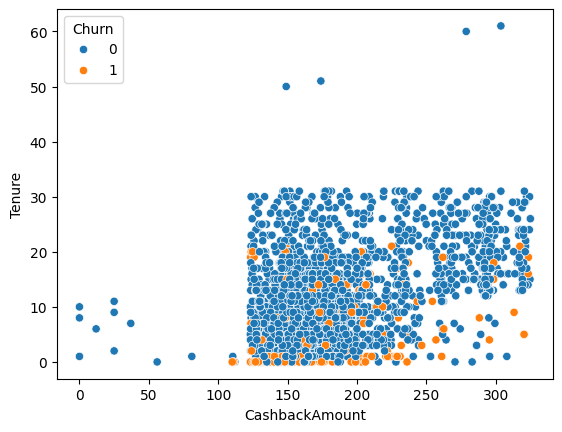

In [18]:
sns.scatterplot(data = df, x='CashbackAmount', y = 'Tenure', hue = 'Churn')

Scatter plot di atas menggambarkan hubungan antara CashbackAmount (jumlah cashback yang diterima pelanggan) pada sumbu X dan Tenure (lama menjadi pelanggan, dalam bulan) pada sumbu Y.<br>

**Kesimpulan**:
- Pelanggan yang churn cenderung memiliki tenure yang lebih pendek dan cashback yang tidak terlalu besar.
- Pelanggan yang loyal (tidak churn) cenderung memiliki tenure lebih lama dan menerima cashback lebih besar.
- Cashback yang lebih tinggi dan masa keanggotaan yang lebih lama berpotensi meningkatkan retensi pelanggan.

<Figure size 2000x800 with 0 Axes>

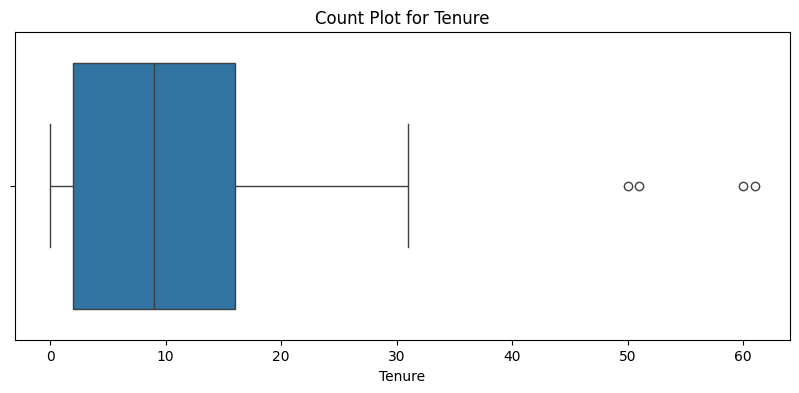

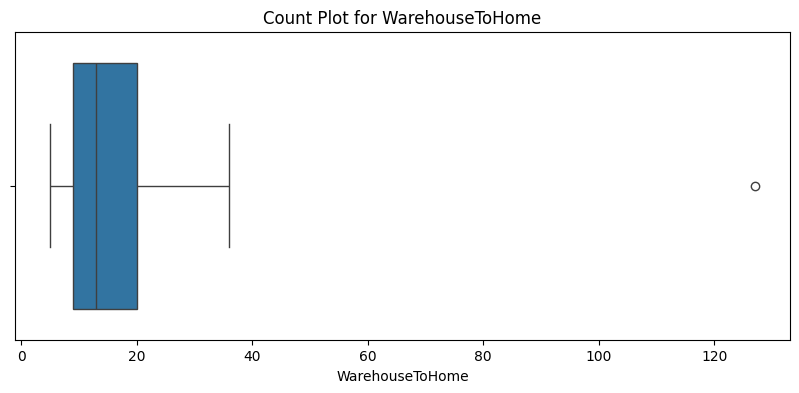

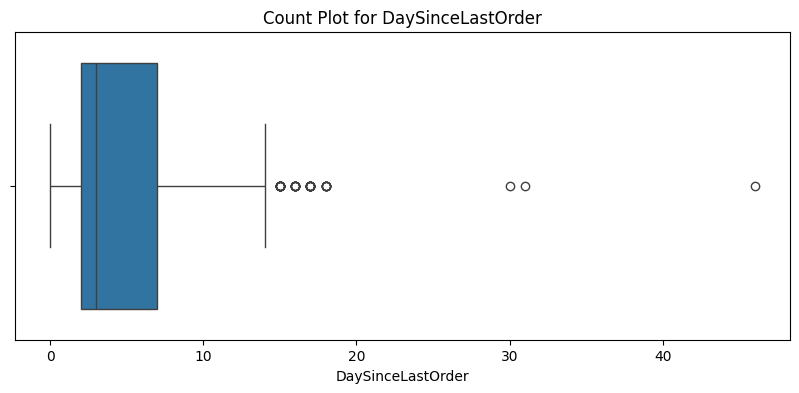

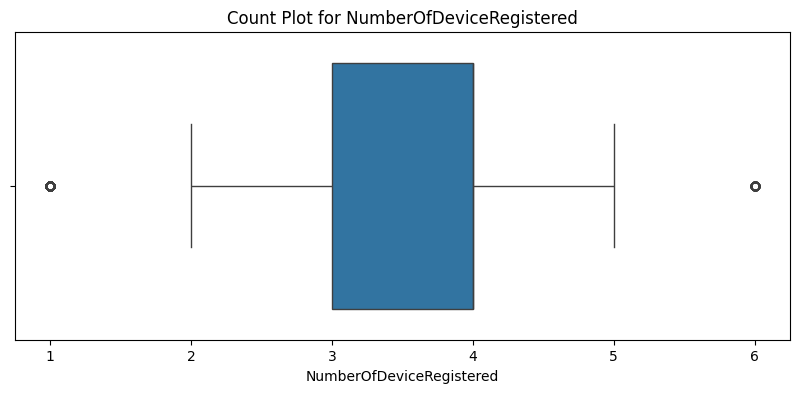

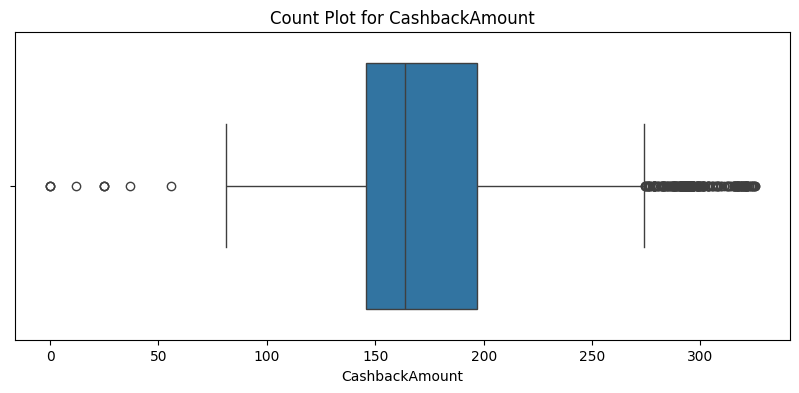

In [19]:
features = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'NumberOfDeviceRegistered', 'CashbackAmount']
plt.figure(figsize=(20, 8))

for feature in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Count Plot for {feature}')
    plt.show()

1. **Tenure**: 
- Outlier: ada beberapa pelanggan dengan tenure sangat tinggi (di atas 50 bulan), yang ditandai dengan titik di luar whisker.
- Insight: mayoritas pelanggan adalah anggota baru atau menengah, hanya sedikit yang sangat loyal dalam jangka panjang.
2. **WarehouseToHome**:
- Interpretasi: sebagian besar pelanggan memiliki jarak pengiriman dari gudang ke rumah antara 5 hingga 35 km, dengan median sekitar 15 km.
- Outlier: ada satu pelanggan dengan jarak pengiriman sangat jauh (sekitar 125 km), yang merupakan outlier.
- Insight: mayoritas pelanggan berada dalam jangkauan pengiriman yang wajar, namun ada kasus khusus dengan jarak sangat jauh.
4. **DaySinceLastOrder**:
- Interpretasi: sebagian besar pelanggan melakukan pembelian terakhir dalam 0-10 hari terakhir, dengan median sangat dekat ke 0.
- Outlier: ada beberapa pelanggan yang sudah sangat lama tidak bertransaksi (lebih dari 30 hari), yang menjadi outlier.
- Insight: mayoritas pelanggan masih aktif, namun ada sebagian kecil yang sudah lama tidak bertransaksi.
5. **NumberOfDeviceRegistered**:
- Interpretasi: sebagian besar pelanggan mendaftarkan 2-5 perangkat, dengan median di angka 3-4.
- Outlier: ada outlier di angka 1 dan 6 perangkat.
- Insight: kebanyakan pelanggan menggunakan beberapa perangkat untuk mengakses layanan, namun ada yang hanya satu atau sangat banyak perangkat.
6. **CashbackAmount**
- Interpretasi: cashback yang diterima pelanggan umumnya berkisar antara 80 hingga 270, dengan median sekitar 170.
- Outlier: ada banyak outlier di kedua sisi, baik cashback sangat kecil (mendekati 0) maupun sangat besar (di atas 270).
- Insight: sebagian besar pelanggan menerima cashback dalam rentang yang wajar, namun ada beberapa yang menerima cashback sangat kecil atau sangat besar.

## **Define X and y**

In [20]:
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5,Fashion,4,Married,0,8.0,249.90,0
3935,26.0,7.0,4,Grocery,1,Married,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,Married,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,0,4.0,157.80,0


In [21]:
X = df.drop(columns=['Churn'])
X

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,29.0,4,Laptop & Accessory,3,Single,0,7.0,143.32
1,7.0,25.0,4,Mobile,1,Married,0,7.0,129.29
2,27.0,13.0,3,Laptop & Accessory,1,Married,0,7.0,168.54
3,20.0,25.0,4,Fashion,3,Divorced,0,NaN,230.27
4,30.0,15.0,4,Others,4,Single,0,8.0,322.17
...,...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5,Fashion,4,Married,0,8.0,249.90
3935,26.0,7.0,4,Grocery,1,Married,0,9.0,295.99
3936,28.0,9.0,5,Fashion,3,Married,0,1.0,231.86
3937,8.0,7.0,2,Mobile Phone,2,Single,0,4.0,157.80


In [22]:
y = df['Churn']
y

0       0
1       0
2       0
3       0
4       0
       ..
3933    0
3935    0
3936    0
3937    0
3940    0
Name: Churn, Length: 3270, dtype: int64

## **Data Splitting**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

In [24]:
y.value_counts()

Churn
0    2736
1     534
Name: count, dtype: int64

## **Preprocessing**

In [25]:
df.isna().sum()

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [26]:
hasil_df

,Kolom,Jumlah Nilai Unik,Nilai Unik
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


1. Missing Value 
- Tenure, WarehouseToHome, DaySinceLastOrder = Iterative Imputer & RobustScaler

2. Encoding
- OneHot encoding = PreferedOrderCat & MaritalStatus

3. Scaling
- MinMaxScaler = NumberOfDeviceRegistered, SatisfactionScore
- RobustScaler = CashbackAmount, Tenure, WarehouseToHome, DaySinceLastOrder (-> Iterative Imputer)

In [27]:
pipe_ite_robust = Pipeline([
    ('iterative', IterativeImputer()),
    ('robust', RobustScaler())
])

In [28]:
transformer = ColumnTransformer([
    ('ite_robust', pipe_ite_robust, ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']),
    ('onehot', OneHotEncoder(), ['PreferedOrderCat', 'MaritalStatus']),
    ('minmaxscaler', MinMaxScaler(), ['NumberOfDeviceRegistered', 'SatisfactionScore']),
    ('robust', RobustScaler(), ['CashbackAmount'])
], remainder='passthrough') 

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ite_robust',
                                 Pipeline(steps=[('iterative',
                                                  IterativeImputer()),
                                                 ('robust', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'DaySinceLastOrder']),
                                ('onehot', OneHotEncoder(),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['NumberOfDeviceRegistered',
                                  'SatisfactionScore']),
                                ('robust', RobustScaler(), ['CashbackAmount'])])

In [29]:
transformer.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ite_robust',
                                 Pipeline(steps=[('iterative',
                                                  IterativeImputer()),
                                                 ('robust', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'DaySinceLastOrder']),
                                ('onehot', OneHotEncoder(),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['NumberOfDeviceRegistered',
                                  'SatisfactionScore']),
                                ('robust', RobustScaler(), ['CashbackAmount'])])

cek missing value

In [30]:
dfn = transformer.transform(X_train)
dfn

array([[ 0.        ,  0.        , -0.4       , ...,  0.        ,
        -0.23393617,  0.        ],
       [-0.66666667,  0.9       , -0.2       , ...,  0.75      ,
        -0.21131829,  0.        ],
       [ 1.16666667,  1.5       , -0.2       , ...,  0.75      ,
         2.33123043,  0.        ],
       ...,
       [-0.33333333,  0.        ,  0.03868143, ...,  0.5       ,
         0.9349035 ,  0.        ],
       [-0.75      ,  0.16304576, -0.8       , ...,  0.5       ,
        -0.76461517,  0.        ],
       [-0.5       , -0.3       , -0.4       , ...,  0.5       ,
        -0.06047012,  0.        ]])

In [31]:
dfn = pd.DataFrame(dfn)
dfn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,0.000000,-0.400000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.8,0.00,-0.233936,0.0
1,-0.666667,0.900000,-0.200000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.6,0.75,-0.211318,0.0
2,1.166667,1.500000,-0.200000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6,0.75,2.331230,0.0
3,-0.250000,-0.500000,-0.200000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.6,1.00,-0.280854,0.0
4,0.083333,0.000000,-0.400000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.6,0.00,0.137670,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0.833333,-0.100000,-0.600000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6,1.00,1.739053,1.0
2612,0.916667,0.100000,0.800000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.8,1.00,0.125894,1.0
2613,-0.333333,0.000000,0.038681,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.8,0.50,0.934904,0.0
2614,-0.750000,0.163046,-0.800000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.8,0.50,-0.764615,0.0


In [32]:
dfn.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

## **Cross Validation**

In [33]:
#resampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

smote = SMOTE(random_state=0)
nearmiss = NearMiss()
rus = RandomUnderSampler(random_state=0)    
ros = RandomOverSampler(random_state=0) 

Model Benchmark

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
logreg = LogisticRegression(random_state=0, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced')
rf = RandomForestClassifier(random_state=0, class_weight='balanced')
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

In [37]:
#Define imbalanced treatment method
models = [logreg, knn, tree, rf, ada, gbc, xgbc]
score = []
nilai_mean = []
nilai_std = []

#F2 score (karena cost dari FN (diprediksi tidak churn, padahal aslinya churn) lebih tinggi dari pada FP (diprediksi churn, padahal aslinya tidak churn))
f2_score = make_scorer(fbeta_score, beta=2)

for i in models:

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('resampler', ros),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator = pipe_model,
        X= X_train,
        y= y_train,
        cv=5,
        scoring=f2_score,
        error_score='raise'
        )

    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

In [38]:
df_cv = pd.DataFrame({
    'model':['logreg', 'knn', 'tree', 'rf',' ada', 'gbc', 'xgbc'],
    'mean':nilai_mean,
    'std':nilai_std
})

df_cv

,model,mean,std
0,logreg,0.672799,0.048815
1,knn,0.648192,0.023677
2,tree,0.588964,0.031484
3,rf,0.699837,0.037093
4,ada,0.589698,0.041166
5,gbc,0.728948,0.036739
6,xgbc,0.728863,0.051564


Model GradientBoost dan XGBoost dipilih menjadi 2 model paling optimal karena memiliki nilai rata-rata paling tinggi.



## **Hyperparameter Tuning**

### Gradient Boost

In [39]:
max_depth = list(np.arange(1,10))               # edalaman pohon
learning_rate = list(np.arange(1,100)/100)      #learning rate
n_estimators = list(np.arange(50,500))          #jumlah pohon
subsample = list(np.arange(2,10)/10)            #jumlah baris train set tiap pohon (% dari total baris train set)
max_features = list(np.arange(1,10))            #jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)

#Hyperparameter GBC
hyperparam_gbc = {
    'resampler':[None, nearmiss, smote, rus, ros],
    'model__max_depth':max_depth ,
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

#Benchmark model 1
gbc = GradientBoostingClassifier(random_state=0)

#algorithm chains
estimator_gbc = Pipeline([
    ('transformer', transformer),
    ('resampler', rus),
    ('model', gbc)
    ])

#Hyperparameter tuning
random_gbc = RandomizedSearchCV(
    estimator_gbc,
    param_distributions = hyperparam_gbc,
    cv = 5,
    scoring = f2_score,
    n_jobs = -1,
    random_state=0,
    n_iter=100
)

In [41]:
random_gbc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ite_robust',
                                                                               Pipeline(steps=[('iterative',
                                                                                                IterativeImputer()),
                                                                                               ('robust',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder']),
                                                                              ('onehot',
                                                                               OneHotEncoder(),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus']),
                                                                              ('minmaxscaler',
                                                                               MinMaxSc...
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)],
                                        'resampler': [None, NearMiss(),
                                                      SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0)]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [42]:
print('Gradient Boosting Classifier')
print('Best_score:', random_gbc.best_score_)
print('Best_params:', random_gbc.best_params_)

Gradient Boosting Classifier
Best_score: 0.7527339836655557
Best_params: {'resampler': RandomUnderSampler(random_state=0), 'model__subsample': np.float64(0.9), 'model__n_estimators': np.int64(193), 'model__max_features': np.int64(8), 'model__max_depth': np.int64(9), 'model__learning_rate': np.float64(0.4)}


### XGBoost

In [43]:
max_depth = list(np.arange(1,11))                       #kedalaman pohon
learning_rate = list(np.arange(0.01, 1.0, 0.01))        #learning rate
n_estimators = list(np.arange(100,201))                 #jumlah pohon
subsample = list(np.arange(0.2, 1.0, 0.1))              #jumlah baris tiap pohon (% dari total baris train set)
gamma = list(np.arange(1,11))                           #gamma (min_impurity_decrease)
colsample_bytree = list(np.arange(0.1, 1.0, 0.2))       #jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
reg_alpha = list(np.logspace(-3,3,7))                   #alpha (regularization)

#Hyperparam XGboost
hyperparam_xgbc = {
    'balancing':[None, nearmiss, smote, rus, ros],
    'model__max_depth':max_depth,
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__gamma':gamma,
    'model__colsample_bytree':colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [44]:
# Benchmark model 2
xgbc = XGBClassifier(random_state=0, verbosity=0)

#algorithm chains
estimator_xgbc = Pipeline([
        ('transformer', transformer),
        ('balancing', smote),
        ('model', xgbc)
        ])

#Hyperparameter tuning
random_xgbc = RandomizedSearchCV(
    estimator_xgbc,
    param_distributions = hyperparam_xgbc,
    cv = 5,
    scoring = f2_score,
    n_jobs = -1,
    random_state=0,
    n_iter=100
)

In [45]:
random_xgbc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ite_robust',
                                                                               Pipeline(steps=[('iterative',
                                                                                                IterativeImputer()),
                                                                                               ('robust',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder']),
                                                                              ('onehot',
                                                                               OneHotEncoder(),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus']),
                                                                              ('minmaxscaler',
                                                                               MinMaxSc...
                                                             np.float64(1000.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.30000000000000004),
                                                             np.float64(0.4000000000000001),
                                                             np.float64(0.5000000000000001),
                                                             np.float64(0.6000000000000001),
                                                             np.float64(0.7000000000000002),
                                                             np.float64(0.8000000000000003),
                                                             np.float64(0.9000000000000001)]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [46]:
pd.DataFrame(random_xgbc.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
60,0.162510,0.017008,0.026027,0.012185,0.8,10.0,118,6,0.94,2,...,RandomOverSampler(random_state=0),"{'model__subsample': 0.8000000000000003, 'model__reg_alpha': 10.0, 'model__n_estimators': 118, 'model__max_depth': 6, 'model__learning_rate': 0.9400000000000001, 'model__gamma': 2, 'model__colsample_bytree': 0.9000000000000001, 'balancing': RandomOverSampler(random_state=0)}",0.786749,0.726496,0.714286,0.736515,0.747368,0.742283,0.024777,1
68,0.111521,0.032033,0.031024,0.029961,0.9,0.1,166,4,0.22,1,...,RandomUnderSampler(random_state=0),"{'model__subsample': 0.9000000000000001, 'model__reg_alpha': 0.1, 'model__n_estimators': 166, 'model__max_depth': 4, 'model__learning_rate': 0.22, 'model__gamma': 1, 'model__colsample_bytree': 0.30000000000000004, 'balancing': RandomUnderSampler(random_state=0)}",0.776892,0.705521,0.705394,0.717172,0.748503,0.730697,0.027957,2
62,0.175128,0.038016,0.023429,0.011691,0.6,10.0,142,10,0.32,10,...,RandomOverSampler(random_state=0),"{'model__subsample': 0.6000000000000001, 'model__reg_alpha': 10.0, 'model__n_estimators': 142, 'model__max_depth': 10, 'model__learning_rate': 0.32, 'model__gamma': 10, 'model__colsample_bytree': 0.9000000000000001, 'balancing': RandomOverSampler(random_state=0)}",0.786290,0.715746,0.711340,0.690722,0.740365,0.728893,0.032754,3
18,0.166694,0.043597,0.022823,0.010326,0.8,0.1,145,3,0.36,4,...,RandomOverSampler(random_state=0),"{'model__subsample': 0.8000000000000003, 'model__reg_alpha': 0.1, 'model__n_estimators': 145, 'model__max_depth': 3, 'model__learning_rate': 0.36000000000000004, 'model__gamma': 4, 'model__colsample_bytree': 0.30000000000000004, 'balancing': RandomOverSampler(random_state=0)}",0.785124,0.695931,0.705128,0.688935,0.742268,0.723477,0.035894,4
99,0.112430,0.007010,0.011495,0.003055,0.9,10.0,144,9,0.15,8,...,RandomOverSampler(random_state=0),"{'model__subsample': 0.9000000000000001, 'model__reg_alpha': 10.0, 'model__n_estimators': 144, 'model__max_depth': 9, 'model__learning_rate': 0.15000000000000002, 'model__gamma': 8, 'model__colsample_bytree': 0.5000000000000001, 'balancing': RandomOverSampler(random_state=0)}",0.777778,0.702306,0.706861,0.699588,0.723140,0.721935,0.029092,5


Dengan menggunakan model XGBClassifier dan resample RandomOverSampler, menghasilkan nilai mean paling tinggi yaitu sebesar 0.742283	.

In [47]:
print('XGBClassifier')
print('Best_score:', random_xgbc.best_score_)
print('Best_params:', random_xgbc.best_params_)

XGBClassifier
Best_score: 0.7422827734114612
Best_params: {'model__subsample': np.float64(0.8000000000000003), 'model__reg_alpha': np.float64(10.0), 'model__n_estimators': np.int64(118), 'model__max_depth': np.int64(6), 'model__learning_rate': np.float64(0.9400000000000001), 'model__gamma': np.int64(2), 'model__colsample_bytree': np.float64(0.9000000000000001), 'balancing': RandomOverSampler(random_state=0)}


In [48]:
print(df_cv[df_cv['model']=='gbc']['mean'].values[0], 'Gradient Boost Benchmark')
print(random_gbc.best_score_, 'Gradient Boost Tuning')
print()

print(df_cv[df_cv['model']=='xgbc']['mean'].values[0], 'XGB Classifier Benchmark')
print(random_xgbc.best_score_, 'XGB Classifier Tuning')

0.7289482302358753 Gradient Boost Benchmark
0.7527339836655557 Gradient Boost Tuning

0.728863421023594 XGB Classifier Benchmark
0.7422827734114612 XGB Classifier Tuning


## **Performance in Test Set**

### Before Hyperparameter Tuning

Gradient Boosting Classifier

In [49]:
model = GradientBoostingClassifier(random_state=0)

model_pipe_gbc = Pipeline([
    ('transformer', transformer),
    ('balancing', smote),
    ('model', model)
])

# fitting
model_pipe_gbc.fit(X_train, y_train)

# predict
y_pred = model_pipe_gbc.predict(X_test)

# recall score
f2score_gbc_benchmark = fbeta_score(y_test, y_pred, beta=2)
f2score_gbc_benchmark

0.718132854578097

XGBClassifier

In [50]:
model = XGBClassifier(random_state=0, verbosity=0)

model_pipe_xgbc = Pipeline([
    ('transformer', transformer),
    ('balancing', smote),
    ('model', model)
])

# fitting
model_pipe_xgbc.fit(X_train, y_train)

# predict
y_pred = model_pipe_xgbc.predict(X_test)

# recall score
f2score_xgbc_benchmark = fbeta_score(y_test, y_pred, beta=2)
f2score_xgbc_benchmark

0.6779661016949152

### After Hyperparameter Tuning

Gradient Boosting Classifier

In [51]:
# best model
gbc_tuning = random_gbc.best_estimator_

# fitting
gbc_tuning.fit(X_train, y_train)

# predict
y_pred_gbc_tuning = gbc_tuning.predict(X_test)

# recall score
f2score_gbc_tuning = fbeta_score(y_test, y_pred_gbc_tuning, beta=2)
f2score_gbc_tuning

0.7761437908496732

XGB Classifier

In [52]:
# best model
xgbc_tuning = random_xgbc.best_estimator_

# fitting
xgbc_tuning.fit(X_train, y_train)

# predict
y_pred_xgbc_tuning = xgbc_tuning.predict(X_test)

# recall score
f2score_xgbc_tuning = fbeta_score(y_test, y_pred_xgbc_tuning, beta=2)
f2score_xgbc_tuning

0.7641196013289037

In [53]:
print(f2score_gbc_benchmark, 'Gradient Boosting Classifier Benchmark')
print(f2score_gbc_tuning, 'Gradient Boosting Classifier Tuning')

0.718132854578097 Gradient Boosting Classifier Benchmark
0.7761437908496732 Gradient Boosting Classifier Tuning


Confusion Matrix

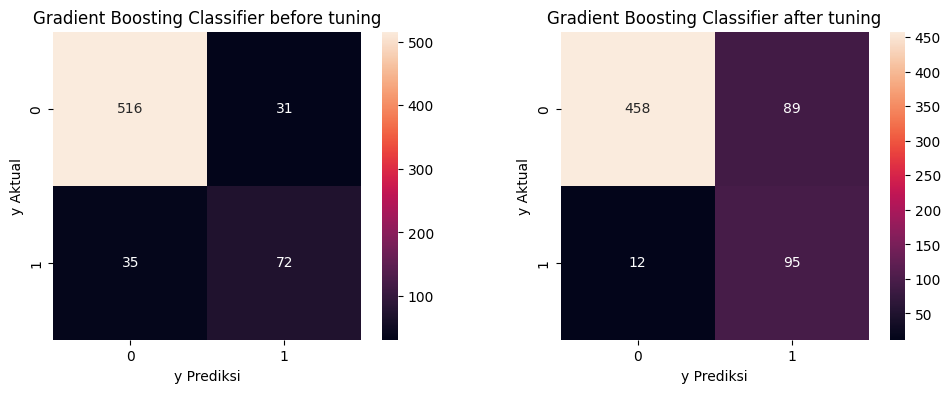

In [ ]:
plt.figure(figsize=(12,4))

# Model GBoost before tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Gradient Boosting Classifier before tuning')

# Model GBoost after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_gbc_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Gradient Boosting Classifier after tuning');

### **Penjelasan:**

**Confusion Matrix Sebelum Tuning (Kiri)**

|  | **Prediksi Loyal (0)** | **Prediksi Churn (1)** |
| --- | --- | --- |
| **Aktual Loyal (0)** | 516 (True Negative) | 31 (False Positive) |
| **Aktual Churn (1)** | 35 (False Negative) | 72 (True Positive) |
- **True Negative (516):** Model benar memprediksi pelanggan loyal sebagai loyal.
- **False Positive (31):** Model salah memprediksi pelanggan loyal sebagai churn. Ini menyebabkan biaya retensi yang tidak perlu.
- **False Negative (35):** Model gagal mendeteksi pelanggan churn, sehingga pelanggan ini berisiko hilang tanpa upaya retensi.
- **True Positive (72):** Model benar memprediksi pelanggan churn.

**Confusion Matrix Setelah Tuning (Kanan)**

|  | **Prediksi Loyal (0)** | **Prediksi Churn (1)** |
| --- | --- | --- |
| **Aktual Loyal (0)** | 458 (True Negative) | 89 (False Positive) |
| **Aktual Churn (1)** | 12 (False Negative) | 95 (True Positive) |
- **True Negative (458):** Jumlah prediksi loyal yang benar menurun.
- **False Positive (89):** Jumlah pelanggan loyal yang salah diprediksi churn meningkat, artinya lebih banyak pelanggan loyal yang mendapat penawaran retensi yang sebenarnya tidak perlu.
- **False Negative (12):** Jumlah pelanggan churn yang tidak terdeteksi menurun signifikan, artinya model lebih baik dalam menangkap pelanggan yang benar-benar akan churn.
- **True Positive (95):** Jumlah prediksi churn yang benar meningkat.

### **Interpretasi dan Implikasi Bisnis**

- **Setelah tuning, model menjadi lebih sensitif dalam mendeteksi pelanggan churn (FN turun dari 35 ke 12),** sehingga perusahaan dapat lebih efektif melakukan upaya retensi pada pelanggan yang benar-benar berisiko berhenti.
- **Namun, biaya meningkat = False Positive (dari 31 ke 89),** yang berarti lebih banyak pelanggan loyal yang diperlakukan seolah-olah akan churn, sehingga biaya retensi meningkat.
- Dalam konteks bisnis, **mengurangi False Negative lebih penting** karena kehilangan pelanggan churn berpotensi merugikan pendapatan dan loyalitas jangka panjang.

In [55]:
y_test.value_counts()

Churn
0    547
1    107
Name: count, dtype: int64

## **Feature Importance**

In [56]:
gbc_tuning

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ite_robust',
                                                  Pipeline(steps=[('iterative',
                                                                   IterativeImputer()),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['NumberOfDeviceRegistered',
                                                   'SatisfactionScore']),
                                                 ('robust', RobustScaler(),
                                                  ['CashbackAmount'])])),
                ('resampler', RandomUnderSampler(random_state=0)),
                ('model',
                 GradientBoostingClassifier(learning_rate=np.float64(0.4),
                                            max_depth=np.int64(9),
                                            max_features=np.int64(8),
                                            n_estimators=np.int64(193),
                                            random_state=0,
                                            subsample=np.float64(0.9)))])

In [57]:
gbc_tuning['model'].feature_importances_

array([0.32369919, 0.10609223, 0.08298764, 0.00742429, 0.00388725,
       0.02062377, 0.00357138, 0.03764789, 0.0028916 , 0.01252193,
       0.01233589, 0.04172264, 0.04735845, 0.05482401, 0.18323014,
       0.0591817 ])

In [58]:
#ite_robust
gbc_tuning['transformer'].transformers_[0][2]

['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

In [59]:
#onehot
list(gbc_tuning['transformer'].transformers_[1][1].get_feature_names_out())

['PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

In [60]:
#minmaxsscaler
list(gbc_tuning['transformer'].transformers_[2][2])

['NumberOfDeviceRegistered', 'SatisfactionScore']

In [61]:
#robust
list(gbc_tuning['transformer'].transformers_[3][2])

['CashbackAmount']

In [62]:
list(X.columns[gbc_tuning['transformer'].transformers_[4][2]])

['Complain']

In [63]:
scale = xgbc_tuning['transformer'].transformers_[0][2]
onehot = list(xgbc_tuning['transformer'].transformers_[1][1].get_feature_names_out())
minmax = list(gbc_tuning['transformer'].transformers_[2][2])
robust = list(gbc_tuning['transformer'].transformers_[3][2])
remainder = list(X.columns[gbc_tuning['transformer'].transformers_[4][2]])

feat = scale + onehot + minmax + robust + remainder
feat

['Tenure',
 'WarehouseToHome',
 'DaySinceLastOrder',
 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'CashbackAmount',
 'Complain']

In [64]:
print(len(feat))
print(len(gbc_tuning['model'].feature_importances_))


16
16


In [65]:
importancee = pd.DataFrame({
    'feature':feat,
    'importance':gbc_tuning['model'].feature_importances_
}).sort_values('importance', ascending=False)

importancee

,feature,importance
0,Tenure,0.323699
14,CashbackAmount,0.183230
1,WarehouseToHome,0.106092
2,DaySinceLastOrder,0.082988
15,Complain,0.059182
13,SatisfactionScore,0.054824
12,NumberOfDeviceRegistered,0.047358
11,MaritalStatus_Single,0.041723
7,PreferedOrderCat_Mobile Phone,0.037648
5,PreferedOrderCat_Laptop & Accessory,0.020624


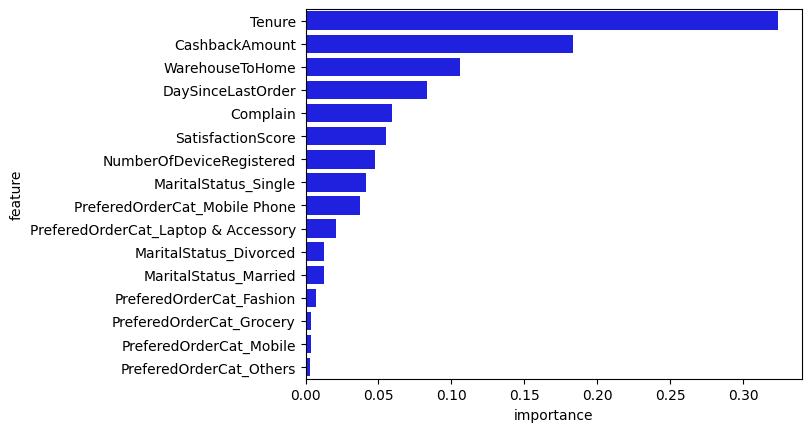

In [66]:
sns.barplot(data=importancee, y='feature', x='importance', color='b');

## **Interpretation**

In [67]:
gbc_tuning[-1]

GradientBoostingClassifier(learning_rate=np.float64(0.4), max_depth=np.int64(9),
                           max_features=np.int64(8), n_estimators=np.int64(193),
                           random_state=0, subsample=np.float64(0.9))

In [68]:
import shap
# ambil model dan data dari pipeline
my_model = gbc_tuning[-1]
my_data = gbc_tuning[0].transform(X_train)

# define explainer
explainer_shap = shap.TreeExplainer(
    model= my_model,
    data= my_data,
    # feature_dependence= 'independent',
    # model_output= 'probability'
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer_shap.shap_values(my_data, check_additivity=False)

 97%|=================== | 2548/2616 [00:25<00:00]       

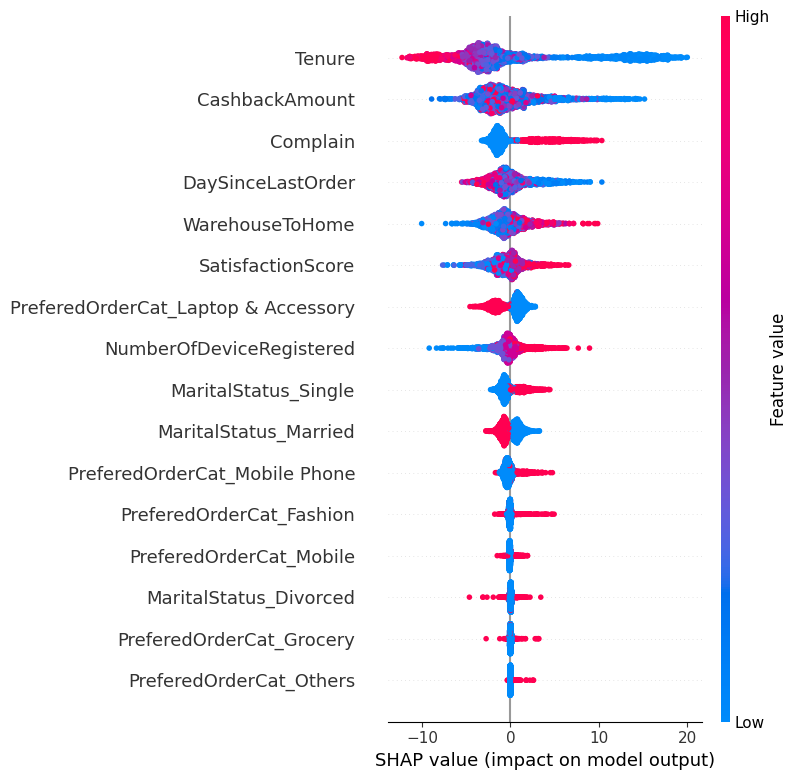

In [69]:
# tampilkan dalam bentuk plot
shap.summary_plot(shap_values, my_data, feature_names=feat)

**Cara Membaca Plot**
- Sumbu Y: Daftar fitur, diurutkan dari yang paling berpengaruh (atas) ke yang kurang berpengaruh (bawah).
- Sumbu X: Nilai SHAP (impact on model output). Nilai positif (kanan) mendorong prediksi ke arah churn, nilai negatif (kiri) mendorong ke arah loyal.
- Warna: Menunjukkan nilai fitur (merah = nilai tinggi, biru = nilai rendah).

#### **1. Memprediksi Pelanggan Churn atau Loyal**

SHAP plot di atas menunjukkan **fitur-fitur utama** yang mempengaruhi prediksi model apakah seorang pelanggan akan churn (berhenti) atau tetap loyal. Setiap titik mewakili satu pelanggan, dan posisi titik di sumbu X menunjukkan seberapa besar fitur tersebut mendorong prediksi ke arah churn (kanan) atau loyal (kiri).

- **Tenure** (lama berlangganan) adalah fitur paling berpengaruh. Nilai tenure yang rendah (biru) mendorong prediksi ke arah churn, sedangkan tenure tinggi (merah) mendorong ke arah loyal. <br>
Banyak pelanggan yang tidak berlangganan, maka diprediksi churn (warna biru dan kearah kanan).
- **CashbackAmount**: Nilai cashback yang rendah (biru) meningkatkan risiko churn, sedangkan cashback tinggi (merah) menurunkan risiko churn.<br> Banyak pelanggan memiliki cashback yang kecil, maka diprediksi akan churn (banyak berwarna biru dan kearah kanan)
- **Complain**: Pelanggan yang pernah komplain (merah) cenderung diprediksi churn.
- **DaySinceLastOrder**: Semakin lama pelanggan tidak bertransaksi (merah), semakin besar kemungkinan churn.
- **WarehouseToHome**: Jarak pengiriman yang jauh (merah) meningkatkan pelanggan akan churn.
- **SatisfactionScore**: Banyak pelanggan yang memberi skor kepuasan rendah (biru) akan mendorong churn.

#### **2. Mengidentifikasi Faktor Utama Penyebab Churn**

SHAP plot juga membantu perusahaan **memahami faktor-faktor utama** yang menyebabkan churn:

- **Tenure** dan **CashbackAmount** adalah dua faktor terbesar. Pelanggan baru dan yang menerima sedikit cashback lebih berisiko churn.
- **Complain** dan **SatisfactionScore** juga sangat penting. Pelanggan yang sering komplain dan tidak puas lebih mudah churn.
- **DaySinceLastOrder** dan **WarehouseToHome** juga signifikan: pelanggan yang jarang bertransaksi dan memiliki jarak pengiriman jauh lebih rentan churn.

In [70]:
# Start js (must have)
shap.initjs()

In [71]:
def shap_plot(index, model, dataframe):

    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(dataframe)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[index], dataframe.iloc[[index]])

    return(p)

In [72]:
gbc_tuning[0]

ColumnTransformer(remainder='passthrough',
                  transformers=[('ite_robust',
                                 Pipeline(steps=[('iterative',
                                                  IterativeImputer()),
                                                 ('robust', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'DaySinceLastOrder']),
                                ('onehot', OneHotEncoder(),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['NumberOfDeviceRegistered',
                                  'SatisfactionScore']),
                                ('robust', RobustScaler(), ['CashbackAmount'])])

In [73]:
# hanya menerima bentuk dataframe
X_test_prep = pd.DataFrame(gbc_tuning[0].transform(X_test), columns=feat)

In [74]:
X_test_prep

,Tenure,WarehouseToHome,DaySinceLastOrder,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,NumberOfDeviceRegistered,SatisfactionScore,CashbackAmount,Complain
0,0.023394,0.000000,-0.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.75,-0.809851,0.0
1,-0.750000,0.163046,-0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.6,1.00,-0.767606,1.0
2,-0.666667,1.800000,-0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.50,-0.308145,0.0
3,-0.750000,-0.600000,-0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.4,0.50,-0.460676,1.0
4,-0.166667,0.170750,0.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.4,0.50,-0.721996,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,0.833333,2.100000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.6,0.00,-0.338240,0.0
650,-0.666667,-0.100000,0.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.2,0.00,-0.261227,0.0
651,-0.750000,0.163046,-0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.4,0.00,-0.733960,1.0
652,1.250000,-0.700000,-0.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.8,0.50,-0.047012,0.0


In [75]:
#ambil data index ke 3
X_test_prep.iloc[[3]]

,Tenure,WarehouseToHome,DaySinceLastOrder,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,NumberOfDeviceRegistered,SatisfactionScore,CashbackAmount,Complain
3,-0.75,-0.6,-0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.4,0.5,-0.460676,1.0


In [76]:
y_test.iloc[[0]]

3251    0
Name: Churn, dtype: int64

In [77]:
y_test.iloc[[3]] #label asli

757    0
Name: Churn, dtype: int64

In [83]:
# Lets compare with the real result
idx = 3
print(f"The prediction must predict this customers is: {('Churn' if y_test.iloc[idx] == 1 else 'Do Not Churn/Mempertahankan Pelanggan')} --> (This is y_test)")

shap_plot(
    index= idx,
    model= my_model,
    dataframe= X_test_prep
)

The prediction must predict this customers is: Do Not Churn/Mempertahankan Pelanggan --> (This is y_test)


- **Warna merah**: Fitur yang mendorong prediksi ke arah **churn** (nilai prediksi lebih tinggi).
- **Warna biru**: Fitur yang mendorong prediksi ke arah **tidak churn** (nilai prediksi lebih rendah).
- **Base value**: Nilai rata-rata prediksi model sebelum mempertimbangkan fitur-fitur spesifik pelanggan ini.
- **f(x)**: Nilai prediksi akhir untuk pelanggan ini setelah semua kontribusi fitur dijumlahkan.

#### **1. Interpretasi Plot untuk Index=3**

- **Label asli pelanggan ini adalah "Do Not Churn" (tidak churn)**, namun model memprediksi **Churn** (karena nilai f(x) sangat tinggi di sisi kanan).
- **Base value**: 0.02702 (nilai rata-rata prediksi churn di seluruh data).
- **Prediksi model: Churn (nilai f(x) = 19.32, jauh di atas threshold)**

#### **2. Fitur yang Mempengaruhi Prediksi**

- **Fitur pendorong prediksi churn (merah):**
    - **SatisfactionScore = 0.5** (rendah)
    - **PreferedOrderCat_Laptop & Accessory = 0**
    - **PreferedOrderCat_Mobile Phone = 1**
    - **Complain = 1** (pernah komplain)
    - **Tenure = -0.75** (masa langganan sangat pendek)
- **Fitur penahan prediksi churn (biru):**
    - **WarehouseToHome = -0.6** (jarak dekat)
    - **NumberOfDeviceRegistered** (banyak perangkat)
#### **3. Konsistensi dengan Feature Importance**
- **Tenure** dan **Complain** memang sangat penting secara global, dan pada kasus ini, nilai **Tenure** yang sangat rendah dan **Complain** yang aktif sangat mendorong prediksi churn.
- **SatisfactionScore** juga penting, dan nilainya rendah di sini.

## **Save Model**

In [85]:
import pickle

best_model = random_gbc.best_estimator_

# fitting
best_model.fit(X_train, y_train)

# save with pickle
pickle.dump(best_model, open('bestmodel_GradientBoost_v1.sav', 'wb'))

In [87]:
# load model

loadmodel = pickle.load(open('bestmodel_GradientBoost_v1.sav', 'rb'))
loadmodel

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ite_robust',
                                                  Pipeline(steps=[('iterative',
                                                                   IterativeImputer()),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['NumberOfDeviceRegistered',
                                                   'SatisfactionScore']),
                                                 ('robust', RobustScaler(),
                                                  ['CashbackAmount'])])),
                ('resampler', RandomUnderSampler(random_state=0)),
                ('model',
                 GradientBoostingClassifier(learning_rate=np.float64(0.4),
                                            max_depth=np.int64(9),
                                            max_features=np.int64(8),
                                            n_estimators=np.int64(193),
                                            random_state=0,
                                            subsample=np.float64(0.9)))])

In [95]:
X.iloc[[3], :]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,DaySinceLastOrder,CashbackAmount
3,20.0,25.0,4,Fashion,3,Divorced,0,NaN,230.27


In [96]:
loadmodel.predict(X.iloc[[3], :])

array([0])

Menggunakan iloc index ke 3, prediksi oleh model menghasilkan bahwa pelanggan tersebut Churn (berhenti berlangganan). Hasil dengan load model ini menghasil hasil prediksi yang sama dengan Shap Plot.

## **Conclusion and Recommendation**

### **Conclusion (Konklusi Akhir & Measurable Solution)**

1. **Solusi yang Dibangun Efektif untuk Prediksi Churn**
    - Model yang dibangun telah mampu **memprediksi kemungkinan pelanggan akan churn atau tetap loyal** dengan memanfaatkan fitur-fitur penting seperti **Tenure, CashbackAmount, WarehouseToHome, DaySinceLastOrder, Complain, dan SatisfactionScore**.
    - Feature importance dan SHAP summary plot menunjukkan bahwa **Tenure** (lama berlangganan) adalah faktor paling dominan: pelanggan baru lebih berisiko churn, pelanggan lama cenderung loyal.
    - **SHAP force plot** pada individu memperlihatkan bagaimana fitur-fitur menggerakkan prediksi ke arah churn atau loyal secara transparan, sehingga keputusan model dapat dijelaskan dan dipertanggungjawabkan.
2. **Identifikasi Faktor Utama Penyebab Churn**
    - Model berhasil mengidentifikasi faktor-faktor utama penyebab churn, sehingga perusahaan dapat menargetkan upaya retensi secara lebih efisien.
    - Contoh: Pelanggan dengan tenure pendek, cashback kecil, sering komplain, dan kepuasan rendah sangat berisiko churn (terlihat jelas baik pada SHAP global maupun lokal).

---

### **Recommendation (Kapan Model Dapat Digunakan & Kapan Tidak)**

**Model Baik Digunakan Ketika:**

- **Mengidentifikasi segmentasi pelanggan berisiko churn tinggi** berdasarkan fitur utama (Tenure, CashbackAmount, SatisfactionScore, Complain).
- Untuk **kampanye retensi yang masif & otomatis**, terutama pada pelanggan baru atau dengan skor churn tinggi.
- **Transparansi prediksi** dibutuhkan, karena SHAP memberikan penjelasan mengapa pelanggan diprediksi churn.
- **Metrik evaluasi (misal recall churn > 70%)** mendukung penggunaan model untuk menghindari kehilangan pelanggan potensial.

**Model Kurang Dapat Dipercaya Ketika:**

- Pada segment **edge case/outlier**: Seperti pada force plot, model bisa salah prediksi pada pelanggan loyal dengan ciri-ciri “berisiko” (False Positive).
- Jika ada **perubahan perilaku pelanggan mendadak** atau fitur penting di luar data model (misal promo musiman, perubahan kebijakan besar).
- Untuk **keputusan individual yang sangat krusial** (misal, pemberian insentif besar), model sebaiknya dikombinasikan dengan review manual/analisa tambahan.
- Bila **akurasi, precision, atau recall churn masih rendah** dalam evaluasi validasi.

---

### **Measurable Business Impact (Dampak terhadap Proses Bisnis)**

- **Retensi pelanggan lebih efisien:** Upaya retensi bisa difokuskan pada pelanggan yang benar-benar berisiko, sehingga anggaran promosi/insentif tidak terbuang untuk pelanggan yang sudah loyal.
- **Strategi personalisasi:** Perusahaan dapat menyusun tindakan proaktif (peningkatan cashback, perbaikan layanan, penanganan komplain) untuk kelompok pelanggan spesifik, berdasarkan fitur-fitur utama yang berpengaruh pada prediksi churn.
- **Monitoring dan evaluasi:** Dampak model dapat diukur secara periodik, misal:
    - **Churn rate sebelum dan sesudah penerapan model.**
    - **Jumlah pelanggan loyal yang berhasil dipertahankan akibat intervensi berbasis model.**
    - **Efisiensi biaya retensi per pelanggan.**
- **Continuous improvement:** Model dapat terus di-update berdasarkan perilaku pelanggan baru dan evaluasi hasil prediksi, sehingga selalu relevan dengan kondisi bisnis terkini.

---

### **Ringkasan**

Solusi berbasis model prediksi churn yang sudah diterapkan mampu diukur keberhasilannya dan terbukti efektif dalam mengarahkan strategi retensi pelanggan. Model sangat baik digunakan untuk segmentasi dan intervensi massal, namun perlu kehati-hatian untuk kasus individual atau perubahan perilaku mendadak. Implementasi model akan mendorong efisiensi biaya, peningkatan loyalitas, dan retensi pelanggan yang lebih terukur dan terarah.